In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# splitting the data
from sklearn.model_selection import train_test_split

# Ml Algorithms
# Linear Regression
from sklearn.linear_model import LinearRegression
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# XGB BOOST Regressor
import xgboost as xgb

# checking accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# for pickling the modelling
import pickle

In [5]:
df = pd.read_csv('car-data.csv')

In [6]:
df.sample(10)

,year,price,transmission,miles runned,fuelType,tax,mpg,engineSize
4710,2017,14000,Manual,26477,Petrol,20,60.1,1.4
5323,2018,22495,Automatic,13054,Petrol,150,44.1,2.0
10686,2020,32427,Semi-Auto,678,Diesel,150,31.4,2.0
10325,2014,11991,Manual,60010,Diesel,165,48.7,2.0
10438,2017,19495,Semi-Auto,39203,Diesel,150,49.6,2.0
7858,2017,9841,Manual,32377,Petrol,145,60.1,1.2
3739,2019,20146,Manual,9127,Petrol,145,45.6,1.5
8160,2016,13401,Manual,6194,Petrol,20,61.4,1.4
10025,2015,9000,Manual,17498,Diesel,0,83.1,1.4
417,2019,19495,Manual,3757,Diesel,145,50.4,1.6


In [7]:
df.shape

(15157, 8)

In [8]:
df.isnull().sum()

year            0
price           0
transmission    0
miles runned    0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [9]:
df["car_age"] = 2021 - df["year"]

df.head()

,year,price,transmission,miles runned,fuelType,tax,mpg,engineSize,car_age
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,2
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,2
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0,2
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,2
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,2


In [10]:
df.year.value_counts()

2019    4669
2017    2947
2016    2647
2018    1509
2015    1153
2020    1046
2014     580
2013     315
2012      80
2011      57
2010      41
2009      31
2008      27
2007      20
2006      16
2005       8
2001       4
2004       3
2003       2
2002       1
2000       1
Name: year, dtype: int64

In [11]:
year_counts = pd.DataFrame(data = df.year.value_counts())

In [12]:
year_counts.reset_index(inplace=True)

In [13]:
year_counts.rename(columns={'index':'year','year':'counts'},inplace=True)
year_counts

,year,counts
0,2019,4669
1,2017,2947
2,2016,2647
3,2018,1509
4,2015,1153
5,2020,1046
6,2014,580
7,2013,315
8,2012,80
9,2011,57


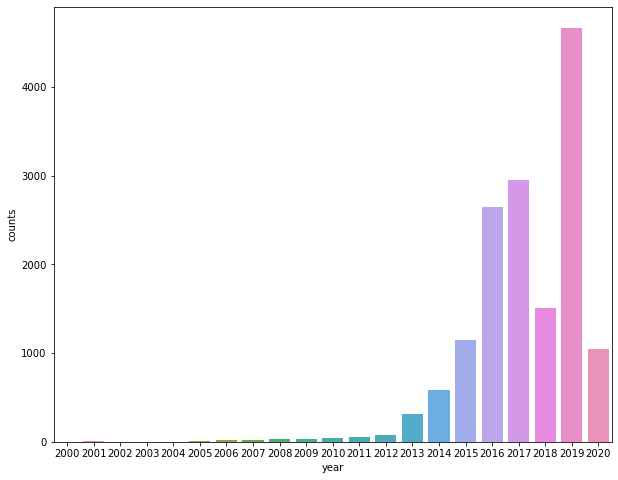

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='year',y='counts',data=year_counts)

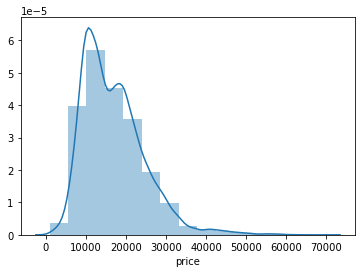

In [15]:
sns.distplot(df["price"],bins=15)

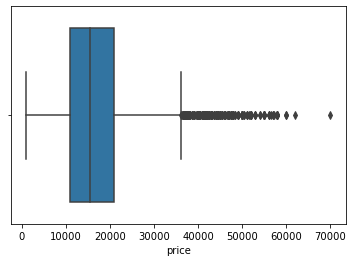

In [16]:
sns.boxplot(df["price"])

In [17]:
# dropping outrange values called as outliers
df[df["price"]>df["price"].quantile(.99)]

,year,price,transmission,miles runned,fuelType,tax,mpg,engineSize,car_age
11849,2019,43995,Automatic,2927,Other,150,30.4,2.0,2
13391,2020,47000,Automatic,1001,Diesel,145,33.6,2.0,1
13397,2019,52999,Semi-Auto,3365,Diesel,145,29.4,2.0,2
13401,2019,46795,Semi-Auto,6280,Diesel,145,33.6,2.0,2
13402,2020,43495,Semi-Auto,2000,Diesel,150,33.6,2.0,1
...,...,...,...,...,...,...,...,...,...
15123,2019,57991,Automatic,10288,Diesel,260,33.2,2.0,2
15124,2019,57991,Automatic,6739,Diesel,260,33.2,2.0,2
15125,2019,57991,Automatic,7259,Diesel,260,33.2,2.0,2
15126,2019,57991,Automatic,7486,Diesel,260,33.2,2.0,2


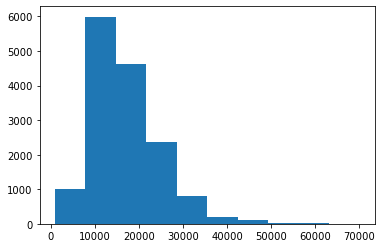

In [18]:
plt.hist(df["price"])
plt.show()

In [19]:
df.transmission.value_counts()

Manual       9417
Semi-Auto    3780
Automatic    1960
Name: transmission, dtype: int64

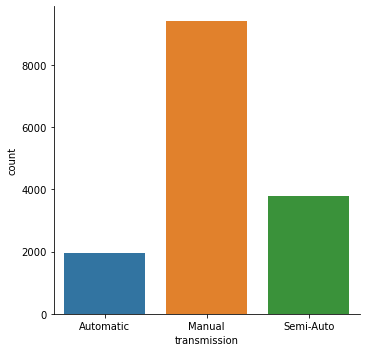

In [20]:
sns.catplot(x='transmission',kind="count",data=df)

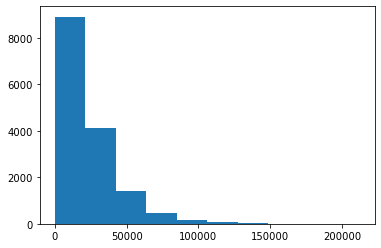

In [21]:
plt.hist(df["miles runned"])
plt.show()

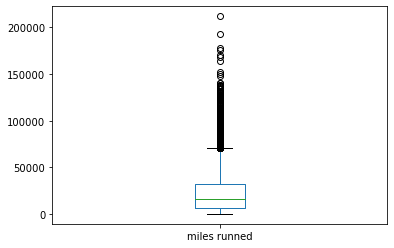

In [22]:
df['miles runned'].plot(kind='box')

In [23]:
df[df["miles runned"]>df["miles runned"].quantile(.99)]

,year,price,transmission,miles runned,fuelType,tax,mpg,engineSize,car_age
761,2010,4995,Manual,99000,Diesel,125,57.6,2.0,11
774,2004,1287,Manual,170000,Diesel,165,52.3,2.0,17
787,2013,6999,Manual,100000,Diesel,0,74.3,1.6,8
789,2010,7999,Manual,101000,Diesel,125,57.6,2.0,11
4394,2009,2999,Manual,101702,Diesel,20,68.9,1.6,12
...,...,...,...,...,...,...,...,...,...
15014,2008,2295,Manual,111000,Diesel,155,48.7,2.0,13
15015,2012,3995,Manual,110750,Diesel,20,67.3,1.6,9
15083,2016,8888,Automatic,108808,Diesel,125,58.9,2.0,5
15110,2012,6695,Manual,98000,Diesel,30,60.1,2.0,9


In [24]:
df.fuelType.value_counts()

Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64

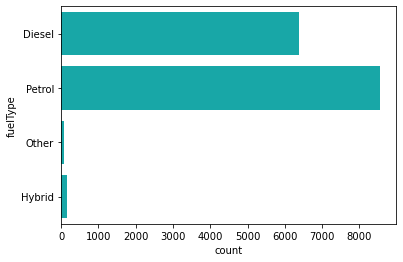

In [25]:
sns.countplot(y='fuelType',data=df,color='c')


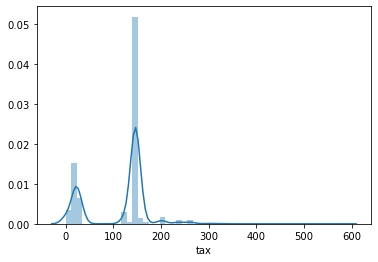

In [26]:
sns.distplot(df['tax'])


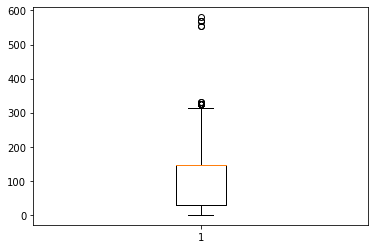

In [27]:
plt.boxplot(df['tax'])
plt.show()

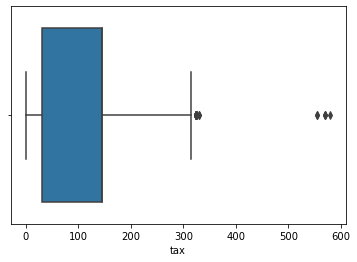

In [28]:
sns.boxplot(df['tax'])

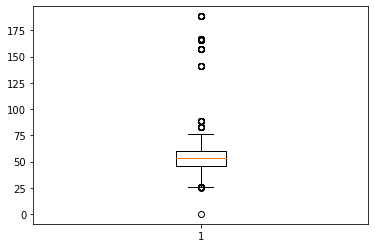

In [29]:
plt.boxplot(df['mpg'])
plt.show()

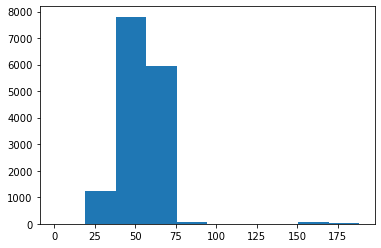

In [30]:
plt.hist(df["mpg"],bins=10)
plt.show()

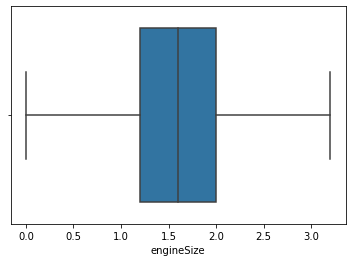

In [31]:
sns.boxplot(df['engineSize'])


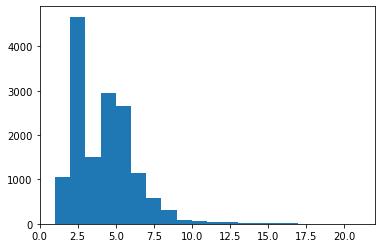

In [32]:
plt.hist(df['car_age'],bins=20)
plt.show()

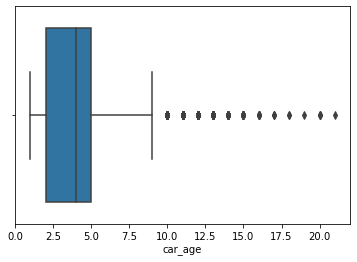

In [33]:
sns.boxplot(df['car_age'])

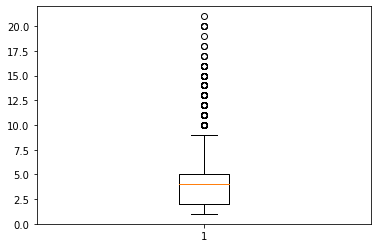

In [34]:
plt.boxplot(df['car_age'])
plt.show()

In [35]:
df = df.drop(['year'],axis=1)
df.head()

,price,transmission,miles runned,fuelType,tax,mpg,engineSize,car_age
0,25000,Automatic,13904,Diesel,145,49.6,2.0,2
1,26883,Automatic,4562,Diesel,145,49.6,2.0,2
2,20000,Manual,7414,Diesel,145,50.4,2.0,2
3,33492,Automatic,4825,Petrol,145,32.5,2.0,2
4,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,2


In [36]:
df.shape

(15157, 8)

In [37]:
df = df.replace({'Automatic': 0, 'Manual': 1, 'Semi-Auto': 2})

df = df.replace({'Diesel': 0, 'Petrol': 1, 'Hybrid': 2, 'Other': 3})

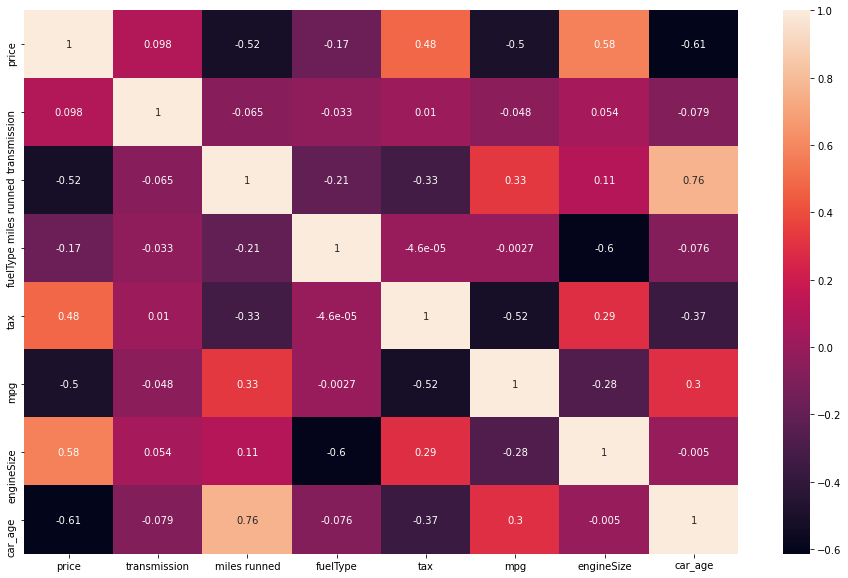

In [38]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

## Splitting target and independent columns

In [88]:
X=df.drop(["price"],axis=1)
X.head()

y = df["price"]
y

0        25000
1        26883
2        20000
3        33492
4        22900
         ...  
15152     5990
15153     1799
15154     1590
15155     1250
15156     2295
Name: price, Length: 15157, dtype: int64

In [42]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

X_train.shape, X_test.shape

((12125, 7), (3032, 7))

## LINEAR REGRESSION

In [43]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [44]:
# for training dataset
lin_reg.score(X_train,y_train)

# for testing dataset
lin_reg.score(X_test,y_test)

0.7591675254865651

In [45]:
lin_reg_predict = lin_reg.predict(X_test)

In [46]:
# checking error rate
print("MAE:", mean_absolute_error(y_test,lin_reg_predict))
print("MSE:", mean_squared_error(y_test,lin_reg_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,lin_reg_predict)))

MAE: 2465.5258059238345
MSE: 14291420.68553133
RMSE: 3780.399540462797


In [48]:
print("Linear Regression accuracy : ",r2_score(y_test,lin_reg_predict))

Linear Regression accuracy :  0.7591675254865651


## RANDOM FOREST REGRESSOR

In [49]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
rfr.score(X_train,y_train)

rfr.score(X_test,y_test)

0.9370566960531278

In [53]:
rfr_predict = rfr.predict(X_test)

In [54]:
# checking error rate
print("MAE:", mean_absolute_error(y_test,rfr_predict))
print("MSE:", mean_squared_error(y_test,rfr_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,rfr_predict)))

MAE: 1229.9410300263996
MSE: 3735165.856927796
RMSE: 1932.6577185129797


In [56]:
print("Random Forest Regression accuracy : ",r2_score(y_test,rfr_predict))

Random Forest Regression accuracy :  0.9370566960531278


## XG BOOST

In [57]:
xgboost = xgb.XGBRegressor(random_state=1,learning_rate=0.1)
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
xgboost.score(X_test,y_test)

xgboost.score(X_train,y_train)

0.954225202742357

In [64]:
xgb_predict = xgboost.predict(X_test)

In [60]:
# checking error rate
print("MAE:", mean_absolute_error(y_test,xgb_predict))
print("MSE:", mean_squared_error(y_test,xgb_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,xgb_predict)))

MAE: 1276.4210650360992
MSE: 3694448.4925450613
RMSE: 1922.0948188226982


In [65]:
print("XG BOOST Regression accuracy : ",r2_score(y_test,xgb_predict))

XG BOOST Regression accuracy :  0.9377428464251399


## Bayesian Regression

In [69]:
from sklearn.linear_model import BayesianRidge

In [70]:
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [71]:
prediction = model.predict(X_test)

In [73]:
# Evaluation of r2 score of the model against the test set
print(f"Bayesian Regression accuracy : {r2_score(y_test, prediction)}")

Bayesian Regression accuracy : 0.7591752811121626


# PICKLE

In [67]:
# Random Forest Reg. Pickle

f = open('rfr.pickle', 'wb')
pickle.dump(rfr, f)
f.close()

In [68]:
# XG Boost Reg. Pickle

f = open('xgboost.pickle', 'wb')
pickle.dump(xgboost, f)
f.close()

## DONE